In [3]:
# Examine SBGC results
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
import isamcalc_lib as isam


In [4]:
# Options
fpath='/data/jain1/c/sshu3/SBGC/results/1D_test/'
frootfr='bgp_to_bgc_initial_rootfr.nc'
frootfr_new='bgp_to_bgc_initial_rootfr_new.nc'
flc='verify_time_invarient.nc'
varname_rootfr='rootfr_bgc'
varname_lc='c_pft_fraction'
nlon=720
nlat=360


In [5]:
# Data from paper Schenk and Jackson, 2002
obs_rootfr_boreal=np.array([0, 72.2093023255814,18.3139534883721,5.49418604651162,2.61627906976744,1.56976744186046,1.04651162790697,0.784883720930232, 0.523255813953483])
obs_dp=np.array([0, -5.82089552238805,-24.6268656716418,-42.5373134328358,-60.8955223880597,-78.8059701492537,-97.6119402985075,-114.626865671642,-133.432835820896])
obs_rootfr_boreal = obs_rootfr_boreal * 0.01
obs_dp = obs_dp * 0.01
accu_fr_obs = np.zeros((9))
# Get accumulated fraction
for j in np.arange(9):
    if(j == 0):
        accu_fr_obs[j] = 0
    else:
        accu_fr_obs[j] = accu_fr_obs[j-1]+obs_rootfr_boreal[j]



In [ ]:
np.shape(accu_fr_obs)

In [6]:
# Read in rootfr
fp=fpath+frootfr
nclu=NetCDFFile(fp,'r')
rootfr = nclu.variables[varname_rootfr][:]
nclu.close()
# Read in LC
fp=fpath+flc
nclu=NetCDFFile(fp,'r')
lc = nclu.variables[varname_lc][:]
nclu.close()
# Read in new rootfr
fp=fpath+frootfr_new
nclu=NetCDFFile(fp,'r')
rootfr_new = nclu.variables[varname_rootfr][:]
nclu.close()

fr_mean=np.zeros((10,24))
fr_mean_new=np.zeros((10,24))

# mask the value using lc and calculate the mean profile for each lc type
for i in np.arange(24):
    for j in np.arange(10):
        pfr = rootfr[j,i,:,:]
        plc = lc[i,:,:]
        pfr[plc<=0] = np.float('nan')
        rootfr[j,i,:,:] = pfr
        fr_mean[j,i] = np.nanmean(pfr)
        pfr = rootfr_new[j,i,:,:]
        pfr[plc<=0] = np.float('nan')
        fr_mean_new[j,i] = np.nanmean(pfr)

accu_fr_mean=np.zeros((10,24))
accu_fr_mean_new=np.zeros((10,24))
# Get accumulated fraction
for i in np.arange(24):
    for j in np.arange(10):
        if(j == 0):
            accu_fr_mean[j,i] = fr_mean[j,i]
            accu_fr_mean_new[j,i] = fr_mean_new[j,i]
        else:
            accu_fr_mean[j,i] = accu_fr_mean[j-1,i]+fr_mean[j,i]
            accu_fr_mean_new[j,i] = accu_fr_mean_new[j-1,i]+fr_mean_new[j,i]

dp = isam.get_isam_soildp(10)


/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice


In [ ]:
accu_fr_mean[:,4]

(-1, 0)

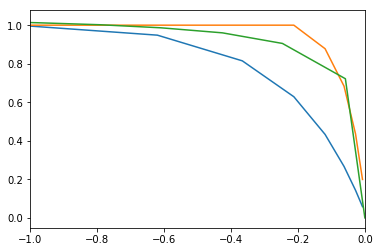

In [7]:
plt.plot(-dp[0], accu_fr_mean[:,4])
plt.plot(-dp[0], accu_fr_mean_new[:,4])
plt.plot(obs_dp, accu_fr_obs)

plt.xlim([-1, 0])

In [8]:
# Examine the vertical SOC stock over the study area
fpath='/data/jain1/c/sshu3/SBGC/results/1D_test/'
fsoilc='Global_1DSBGC.bgc-yearly-3d_11900.nc'
varname_soilc='soil_c_lev'
# Read in soilc
fp=fpath+fsoilc
nclu=NetCDFFile(fp,'r')
soilc_lev = nclu.variables[varname_soilc][:]
nclu.close()

# Calculate Earth's area
# Area of each grid
grid_area = np.zeros((nlat, nlon))
EARTH_AREA = 5.096e14
lat = np.arange(-89.75, 90.25, 0.5)
res = 0.5

for i in np.arange(0,nlat):
    for j in np.arange(0,nlon):
        grid_area[i,j] = (EARTH_AREA/2)*abs(np.sin((lat[i] - res/2)*math.pi/180) -
                np.sin((lat[i] + res/2)*math.pi/180))/(360/res)

totsoilc = np.zeros((10))
for i in np.arange(10):
    soilc_lev[i,:,:] = soilc_lev[i,:,:]*grid_area
    totsoilc[i] = np.nansum(soilc_lev[i,:,:])/1e12

In [ ]:
totsoilc

In [9]:
np.sum(totsoilc[0:6])

311.62718314587516